<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    82.104016  73.548086  92.945325   1.762847  260.360274   
      1.0    83.118363  35.475907  33.857412 -10.568065  151.883617   
      2.0    33.712638  93.705424  55.613788 -10.722643  182.309208   
      3.0    53.200670  87.252086  42.162041 -11.715283  180.899514   
      4.0    42.706185  71.618722  73.419907 -11.492983  186.251830   
...                ...        ...        ...        ...         ...   
999.0 55.0   36.845199  94.892406  38.341774  -0.152580  179.926800   
      56.0   57.059002  39.229541  20.270239  -2.153716  124.405066   
      57.0   47.457648  64.052255  63.466863 -15.418689  169.558077   
      58.0   60.389822  22.138547  50.416442   1.124921  144.069731   
      59.0   33.993998  94.878781  52.655892  14.879880  206.408550   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    252.763269   7.597005  
      1.0    161.965477 -10.081860  
      2.0    190.557753  -8.248545  
      3.0    189.473757  -8.574243  
      4.0    196.095329  -9.843499  
...                 ...        ...  
999.0 55.0   179.518048   0.408752  
      56.0   124.374573   0.030494  
      57.0   181.652546 -12.094469  
      58.0   138.087285   5.982447  
      59.0   189.884019  16.524531  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    82.104016  73.548086  92.945325   1.762847  260.360274   
      1.0    83.118363  35.475907  33.857412 -10.568065  151.883617   
      2.0    33.712638  93.705424  55.613788 -10.722643  182.309208   
      3.0    53.200670  87.252086  42.162041 -11.715283  180.899514   
      4.0    42.706185  71.618722  73.419907 -11.492983  186.251830   
...                ...        ...        ...        ...         ...   
999.0 55.0   36.845199  94.892406  38.341774  -0.152580  179.926800   
      56.0   57.059002  39.229541  20.270239  -2.153716  124.405066   
      57.0   47.457648  64.052255  63.466863 -15.418689  169.558077   
      58.0   60.389822  22.138547  50.416442   1.124921  144.069731   
      59.0   33.993998  94.878781  52.655892  14.879880  206.408550   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    252.763269   7.597005  
      1.0    161.965477 -10.081860  
      2.0    190.557753  -8.248545  
      3.0    189.473757  -8.574243  
      4.0    196.095329  -9.843499  
...                 ...        ...  
999.0 55.0   179.518048   0.408752  
      56.0   124.374573   0.030494  
      57.0   181.652546 -12.094469  
      58.0   138.087285   5.982447  
      59.0   189.884019  16.524531  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    82.104016  73.548086  92.945325   1.762847  260.360274   
      1.0    83.118363  35.475907  33.857412 -10.568065  151.883617   
      2.0    33.712638  93.705424  55.613788 -10.722643  182.309208   
      3.0    53.200670  87.252086  42.162041 -11.715283  180.899514   
      4.0    42.706185  71.618722  73.419907 -11.492983  186.251830   
...                ...        ...        ...        ...         ...   
999.0 55.0   36.845199  94.892406  38.341774  -0.152580  179.926800   
      56.0   57.059002  39.229541  20.270239  -2.153716  124.405066   
      57.0   47.457648  64.052255  63.466863 -15.418689  169.558077   
      58.0   60.389822  22.138547  50.416442   1.124921  144.069731   
      59.0   33.993998  94.878781  52.655892  14.879880  206.408550   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    252.763269   7.597005  
      1.0    161.965477 -10.081860  
      2.0    190.557753  -8.248545  
      3.0    189.473757  -8.574243  
      4.0    196.095329  -9.843499  
...                 ...        ...  
999.0 55.0   179.518048   0.408752  
      56.0   124.374573   0.030494  
      57.0   181.652546 -12.094469  
      58.0   138.087285   5.982447  
      59.0   189.884019  16.524531  

[60000 rows x 7 columns]

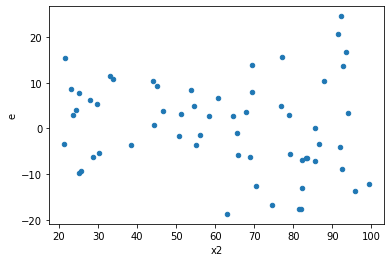

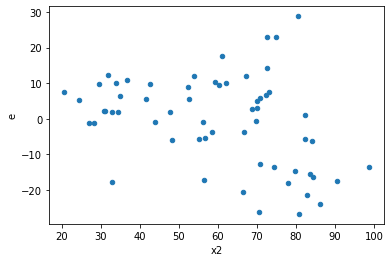

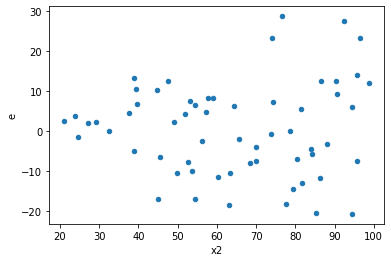

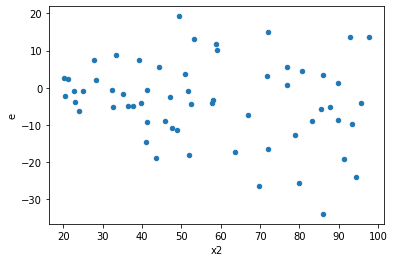

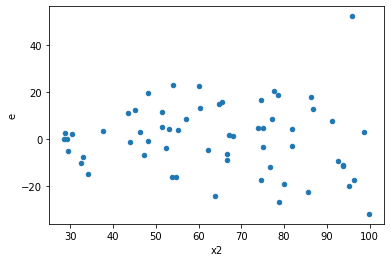

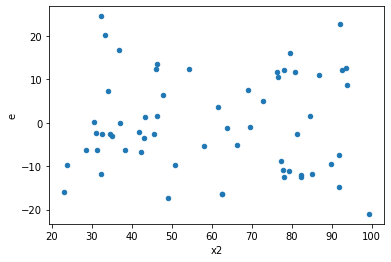

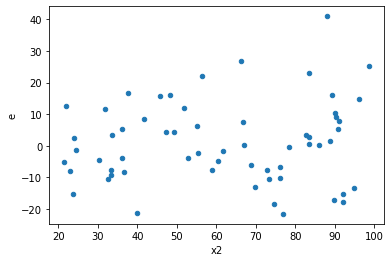

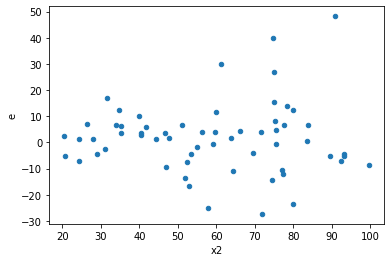

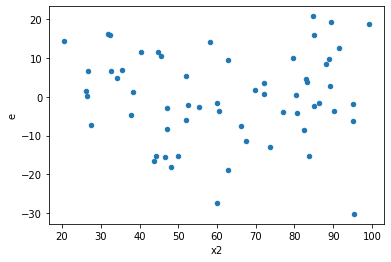

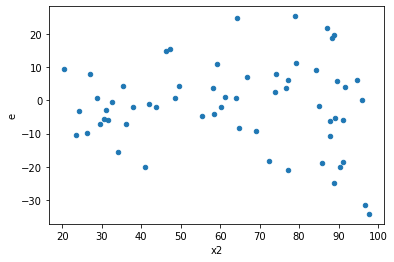

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,32.0,1842.395865182259,4890.585761903979,83.7452665991936,152.83080505949934,1.8249485763888056,0.11807399889504167,0.9409630005524792,0.05903699944752083,Reject005=1 : Homoscedasticity
9.0,41.0,13.0,4754.257506994958,1995.4006393498864,115.95750017060874,153.4923568730682,1.3236949455381002,0.6010766104717775,0.6994616947641112,0.30053830523588876,Reject005=1 : Homoscedasticity
10.0,21.0,33.0,1182.5943323151628,3998.6901486302127,56.31401582453156,121.17242874637009,2.151727717730705,0.04723310706678863,0.9763834464666057,0.023616553533394313,Reject005=0 : Heteroscedasticity
13.0,26.0,28.0,2543.651552502394,3501.942787966196,97.83275201932285,125.069385284507,1.2783999499452359,0.5242922587675674,0.7378538706162163,0.2621461293837837,Reject005=1 : Homoscedasticity
15.0,34.0,20.0,3227.020654182805,2934.7245326315383,94.91237218184722,146.73622663157693,1.546017903234342,0.3055318495202566,0.8472340752398717,0.1527659247601283,Reject005=1 : Homoscedasticity
17.0,25.0,29.0,3830.9907650844134,6016.087842195596,153.23963060337653,207.4513049032964,1.3537705884989608,0.43038058618624864,0.7848097069068757,0.21519029309312432,Reject005=1 : Homoscedasticity
18.0,29.0,25.0,2346.731387452637,3522.6576847245515,80.92177198112542,140.90630738898207,1.7412657179806659,0.1627569913293263,0.9186215043353368,0.08137849566466315,Reject005=1 : Homoscedasticity
19.0,27.0,27.0,2048.835484917448,6248.355604215711,75.88279573768325,231.4205779339152,3.049710750430248,0.005088520934933394,0.9974557395325333,0.002544260467466697,Reject005=0 : Heteroscedasticity
22.0,34.0,20.0,3444.5892749096724,3029.530960866905,101.3114492620492,151.47654804334525,1.495157251689693,0.34456764864100187,0.8277161756794991,0.17228382432050093,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,32.0,1842.395865182259,4890.585761903979,83.7452665991936,152.83080505949934,1.8249485763888056,0.11807399889504167,Reject005=1 : Homoscedasticity
1.0,31.0,23.0,5968.545758397849,967.1686561181219,192.5337341418661,42.05081113557052,0.21840749790156722,0.00011412183859812786,Reject005=0 : Heteroscedasticity
2.0,32.0,22.0,3743.79838872913,1823.247124511009,116.9936996477853,82.87486929595495,0.7083703613566662,0.36622347680455586,Reject005=1 : Homoscedasticity
3.0,28.0,26.0,4537.278711369762,2870.714400268612,162.04566826320578,110.41209231802353,0.6813640469468432,0.3216737677060452,Reject005=1 : Homoscedasticity
4.0,36.0,18.0,4773.147117755138,1854.4173282862366,132.58741993764272,103.02318490479092,0.7770208135375425,0.5057257524532728,Reject005=1 : Homoscedasticity
5.0,23.0,31.0,5448.742848703314,3163.3622028180826,236.9018629871006,102.04394202638976,0.4307435186018191,0.04000007970005046,Reject005=0 : Heteroscedasticity
6.0,29.0,25.0,4340.440554357551,3049.629354357087,149.67036394336384,121.98517417428347,0.8150255732687561,0.5923074096518537,Reject005=1 : Homoscedasticity
7.0,19.0,35.0,3372.5892550146277,3159.6838790609263,177.50469763234884,90.27668225888361,0.5085875667688887,0.11975165537434675,Reject005=1 : Homoscedasticity
8.0,31.0,23.0,4995.933486587126,1697.2074264829507,161.15914472861698,73.79162723838917,0.45788048430419603,0.04325836561520419,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      794
Reject005=0 : Heteroscedasticity    206
Name: Result_test, dtype: int64